# **Task 1**

35497
35497
35497
1853
1853
1853


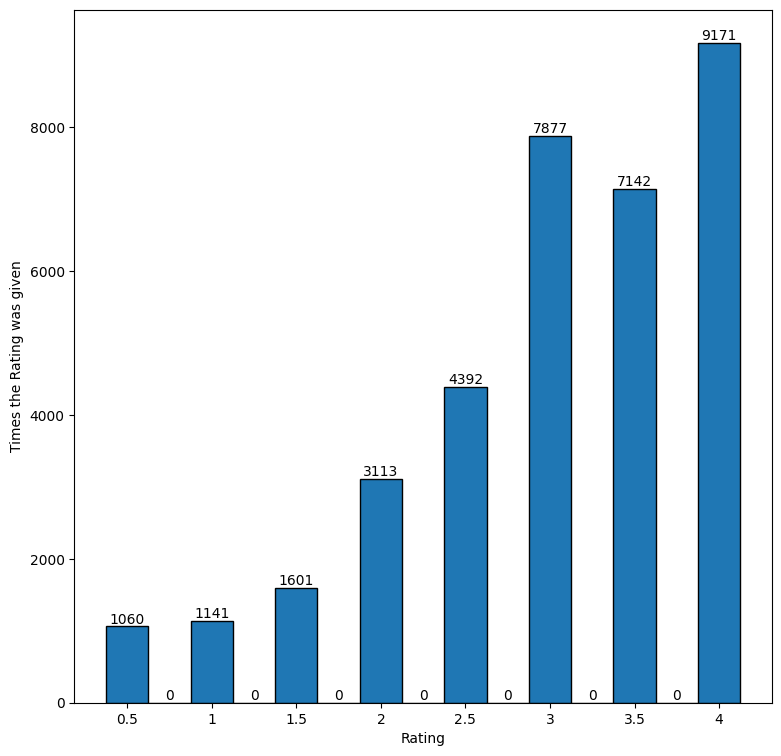

+------+------------------+------------+
|ItemID|     AverageRating|NumOfRatings|
+------+------------------+------------+
|   363| 3.769230769230769|          13|
|   286| 3.760869565217391|          23|
|   307| 3.717391304347826|          23|
|   805|3.7142857142857144|          35|
|   705|3.6785714285714284|          14|
|   696|3.6666666666666665|          18|
|   335|3.6578947368421053|          19|
|   400| 3.642857142857143|          14|
|   728| 3.576923076923077|          13|
|   342| 3.576923076923077|          13|
|   675| 3.548780487804878|          41|
|   299|3.5476190476190474|          21|
|   297|3.5384615384615383|          13|
|   702|3.5357142857142856|          14|
|   658|3.5217391304347827|          23|
|   218|3.5135135135135136|          74|
|   318| 3.509259259259259|          54|
|   242|               3.5|          54|
|   657| 3.477272727272727|          22|
|   293|             3.475|          20|
+------+------------------+------------+
only showing top

In [151]:
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *

spark = SparkSession.builder.getOrCreate() #Create the spark session
RatingsDF = spark.read.text("ratings.txt") #Read the contents of ratings.txt

RatingsDF = RatingsDF.withColumn('UserID', split(RatingsDF['value'], ' ').getItem(0))
RatingsDF = RatingsDF.withColumn('UserID', RatingsDF['UserID'].cast(IntegerType()))
RatingsDF = RatingsDF.withColumn('ItemID', split(RatingsDF['value'], ' ').getItem(1))
RatingsDF = RatingsDF.withColumn('UserID', RatingsDF['ItemID'].cast(IntegerType()))
RatingsDF = RatingsDF.withColumn('Rating', split(RatingsDF['value'], ' ').getItem(2))
RatingsDF = RatingsDF.withColumn('UserID', RatingsDF['Rating'].cast(FloatType()))
RatingsDF = RatingsDF.drop('value')
# 
#Create 3 new columns from the original reading of the text file with the delimiter being a space.
#Then delete the original column of all the data together to leave the 3 columns of usable data present
#

print(RatingsDF.count()) #Display the number of rows in RatingsDF
RatingsDF.dropna() #Remove rows with empty data present
print(RatingsDF.count()) #Display the number of rows in RatingsDF so it can be compared to remove removing incomplete rows
RatingsDF.dropDuplicates() #Remove rows that are duplicates of each other
print(RatingsDF.count()) #Display the number of rows in RatingsDF so it can be comapred to see how much data cleaning has taken place

#Repeat the entire process for the trust.txt file into a second dataframe
TrustDF = spark.read.text("trust.txt")
TrustDF = TrustDF.withColumn('TrustorUserID', split(TrustDF['value'], ' ').getItem(0))
TrustDF = TrustDF.withColumn('TrustorUserID', TrustDF['TrustorUserID'].cast(IntegerType()))
TrustDF = TrustDF.withColumn('TrusteeUserID', split(TrustDF['value'], ' ').getItem(1))
TrustDF = TrustDF.withColumn('TrusteeUserID', TrustDF['TrusteeUserID'].cast(IntegerType()))
TrustDF = TrustDF.withColumn('TrustValue', split(TrustDF['value'], ' ').getItem(2))
TrustDF = TrustDF.withColumn('TrustValue', TrustDF['TrustValue'].cast(IntegerType()))
TrustDF = TrustDF.drop('value')
print(TrustDF.count())
TrustDF.dropna()
print(TrustDF.count())
TrustDF.dropDuplicates()
print(TrustDF.count())

import matplotlib.pyplot as plt
import numpy as np

RatingsOnly = RatingsDF.select('Rating').rdd.flatMap(lambda x: x).collect()
RatingsOnly.sort()
plt.rcParams['figure.dpi'] = 100
bins=[-0.25, 0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25, 5.75, 6.25, 6.75, 7.25]
fig, ax = plt.subplots(figsize = (9,9))
counts, edges, bars = plt.hist(RatingsOnly, bins=bins, edgecolor="black")
plt.xlabel('Rating')
plt.ylabel('Times the Rating was given')
plt.bar_label(bars)
plt.show()
#https://docs.kanaries.net/topics/PySpark/pyspark-dataframe-column-list
#https://www.geeksforgeeks.org/how-to-plot-histogram-from-list-of-data-in-matplotlib/
#https://stackoverflow.com/questions/39841733/matplotlib-histogram-how-to-display-the-count-over-the-bar
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html


df = RatingsDF.groupBy("ItemID").agg(mean('Rating').alias("AverageRating"), count('ItemID').alias("NumOfRatings"))
df = df.filter(df.NumOfRatings > 10)
df.orderBy(desc("AverageRating")).show()

https://saturncloud.io/blog/how-to-split-a-column-into-multiple-columns-in-pyspark-without-using-pandas/
https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.withColumn.html